## Importing Libraries



In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import string
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()


from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luckyboy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Luckyboy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Importing model creation libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

# to automate the NLP extraction...
from sklearn.feature_extraction.text import CountVectorizer

# Cross_val_score is the new class for today...
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# main ones to focus on for this sprint
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Covered in sprint 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Covered in sprint 4
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Neural Network!!
from sklearn.neural_network import MLPClassifier

## Overview of the data( Exploratory Data Analysis)

In [3]:
mbti = pd.read_csv('train.csv')
mbti.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [117]:
#There are 6506 rows and and 2 columns in the dataframe
mbti.shape

(6506, 2)

In [118]:
#Check how many types we have and how each of them consists of the posts
mbti['type'].unique()
#mbti['type'].nunique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [119]:
#How many posts does each type consists of
mbti['type'].value_counts()

INFP    1386
INFJ    1100
INTP     960
INTJ     830
ENTP     530
ENFP     496
ISTP     255
ISFP     198
ENTJ     167
ISTJ     145
ENFJ     143
ISFJ     124
ESTP      71
ESFP      36
ESFJ      35
ESTJ      30
Name: type, dtype: int64

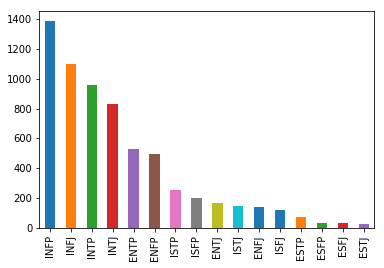

In [120]:
#Visualize the posts per personality type
mbti['type'].value_counts().plot(kind = 'bar')
plt.show()

In [4]:
#Encode the classes

mbti['I or E'] = mbti['type'].apply(lambda x: x[0] == 'I').astype('int')
mbti['S or N'] = mbti['type'].apply(lambda x: x[1] == 'S').astype('int')
mbti['F or T'] = mbti['type'].apply(lambda x: x[2] == 'F').astype('int')
mbti['J or P'] = mbti['type'].apply(lambda x: x[3] == 'J').astype('int')

In [5]:
mbti.head()

,type,posts,I or E,S or N,F or T,J or P
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,0,1,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,0,0,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,0,0,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,0,0,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,0,0,1


In [6]:
#Seperating the posts by "|||"

all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [124]:
#On this code, we encode the labels after we have seperated them by |||

all_mbti['I or E'] = all_mbti['type'].apply(lambda x: x[0] == 'I').astype('int')
all_mbti['S or N'] = all_mbti['type'].apply(lambda x: x[1] == 'N').astype('int')
all_mbti['F or T'] = all_mbti['type'].apply(lambda x: x[2] == 'F').astype('int')
all_mbti['J or P'] = all_mbti['type'].apply(lambda x: x[3] == 'J').astype('int')

In [7]:
#View the first five rows
all_mbti.head(5)

,type,post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...


In [8]:
all_mbti.shape

(316548, 2)

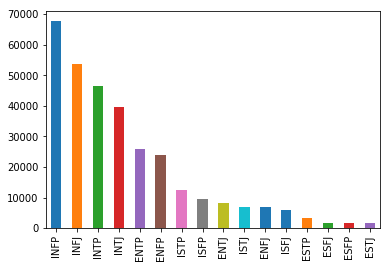

In [9]:
#Visualize the posts per personality type
all_mbti['type'].value_counts().plot(kind = 'bar')
plt.show()



   
     

# Preprocessing text


In [10]:
## split the rows
all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

## remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_mbti['post'] = all_mbti['post'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# make lower case
all_mbti['post'] = all_mbti['post'].str.lower()

import string
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
all_mbti['post'] = all_mbti['post'].apply(remove_punctuation_numbers)

In [11]:
all_mbti.head()

,type,post
0,INFJ,urlweb
1,INFJ,urlweb
2,INFJ,enfp and intj moments urlweb sportscenter no...
3,INFJ,what has been the most lifechanging experience...
4,INFJ,urlweb urlweb on repeat for most of today


In [12]:

all_mbti['I or E'] = all_mbti['type'].apply(lambda x: x[0] == 'I').astype('int')
all_mbti['S or N'] = all_mbti['type'].apply(lambda x: x[1] == 'N').astype('int')
all_mbti['F or T'] = all_mbti['type'].apply(lambda x: x[2] == 'F').astype('int')
all_mbti['J or P'] = all_mbti['type'].apply(lambda x: x[3] == 'J').astype('int')

--- 

# 1. Building a model on: [I or E]

In [144]:
# we will be using the standard CountVector to fit the model to see if we can indeed predict the
# introvert/extrovert status

vect = CountVectorizer(lowercase=True, stop_words='english', max_features=20)
X = vect.fit_transform(all_mbti['post'])

In [145]:
vect.get_feature_names()

['dont',
 'feel',
 'good',
 'im',
 'ive',
 'just',
 'know',
 'like',
 'lot',
 'love',
 'people',
 'really',
 'say',
 'things',
 'think',
 'time',
 'type',
 'urlweb',
 'want',
 'way']

In [26]:
X = all_mbti['post']
yI = all_mbti['I or E']

In [27]:
n = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:n], yI[:n])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750,)
(1250,)
(3750,)
(1250,)


___

### Logistic regression

In [28]:

all_mbti['I or E'] = all_mbti['type'].apply(lambda x: x[0] == 'I').astype('int')
all_mbti['S or N'] = all_mbti['type'].apply(lambda x: x[1] == 'N').astype('int')
all_mbti['F or T'] = all_mbti['type'].apply(lambda x: x[2] == 'F').astype('int')
all_mbti['J or P'] = all_mbti['type'].apply(lambda x: x[3] == 'J').astype('int')
all_mbti.head()
#all_mbti.drop(['I','N','T','J'],axis=1,inplace=True)

,type,post,I or E,S or N,F or T,J or P
0,INFJ,urlweb,1,1,1,1
1,INFJ,urlweb,1,1,1,1
2,INFJ,enfp and intj moments urlweb sportscenter no...,1,1,1,1
3,INFJ,what has been the most lifechanging experience...,1,1,1,1
4,INFJ,urlweb urlweb on repeat for most of today,1,1,1,1


In [29]:
# we will be using the standard CountVector to fit the model to see if we can indeed predict the
# introvert/extrovert status
vect = CountVectorizer()
X = vect.fit_transform(all_mbti['post'])

vect = CountVectorizer(lowercase=True, stop_words='english', max_features=10)
X = vect.fit_transform(all_mbti['post'])

In [30]:
vect.get_feature_names()

['dont',
 'im',
 'ive',
 'just',
 'know',
 'like',
 'people',
 'really',
 'think',
 'urlweb']

In [31]:
yI = all_mbti['I or E']

In [32]:
yI.head()

0    1
1    1
2    1
3    1
4    1
Name: I or E, dtype: int32

In [33]:
n = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:n], yI[:n])

In [34]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

# generate predictions
y_pred_train = logreg.predict(X_train)

In [35]:
# generate predictions
y_pred_test = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test)

0.7952

In [36]:
y_pred_test

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)
print("Training Set")
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, y_pred_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print("")

print("Test Set")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


Training Set
Accuracy:  0.8016
Confusion Matrix:
[[   0  744]
 [   0 3006]]
Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       744
          1       0.80      1.00      0.89      3006

avg / total       0.64      0.80      0.71      3750


Test Set
Accuracy:  0.7952
Confusion Matrix:
[[  0 256]
 [  0 994]]
Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       256
          1       0.80      1.00      0.89       994

avg / total       0.63      0.80      0.70      1250



C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM

In [38]:
n = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:n].toarray(), yI[:n])


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[   0,  250],
       [   0, 1000]], dtype=int64)

In [43]:
svm = SVC(kernel='rbf',gamma=1, C=1.0)

In [44]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.60      0.01      0.02       250
          1       0.80      1.00      0.89      1000

avg / total       0.76      0.80      0.72      1250



In [46]:
print(accuracy_score(y_test,y_pred))

0.8008


In [47]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))

Predicted  0    1
Actual           
0          3  247
1          2  998


In [48]:
#import and instantiate CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_count = vect.fit_transform(all_mbti['post'])

In [49]:
X = X_count

In [139]:
yS = all_mbti['I or E']

In [141]:
vect_10 = CountVectorizer(lowercase=True, stop_words='english', max_features=10)
X_count = vect_10.fit_transform(all_mbti['post'])

In [142]:
X_count.shape

(316548, 10)

In [175]:
n = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:n].toarray(), yI[:n])

In [176]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Naive Bayes', 'LDA', "QDA",
         "Decision Tree", "Random Forest",  "AdaBoost",
         "Neural Net"]

In [177]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),

    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),

    MLPClassifier(alpha=1)
]

In [178]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])
    
    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...


C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...


C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
Fitting LDA model...
... predicting
... scoring
Fitting QDA model...


C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Neural Net model...
... predicting
... scoring


C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [179]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,0.813867,0.811669,0.998664,0.895509,0.887996,0.680129
Decision Tree,0.800267,0.801072,0.997663,0.888625,0.889186,0.003873
Random Forest,0.798933,0.798880,1.000000,0.888197,0.891353,0.124422
Logistic Regression,0.798667,0.798667,1.000000,0.888065,0.891353,0.008003
Linear SVM,0.798667,0.798667,1.000000,0.888065,0.891353,0.272926
LDA,0.798667,0.798667,1.000000,0.888065,0.891353,0.007170
Neural Net,0.798667,0.798667,1.000000,0.888065,0.891353,1.374590
AdaBoost,0.798400,0.798613,0.999666,0.887900,0.890368,0.255685
QDA,0.793600,0.801357,0.985977,0.884132,0.883221,0.004177


In [180]:
confusion['Logistic Regression']

array([[   0,  755],
       [   0, 2995]], dtype=int64)

In [183]:
confusion['Naive Bayes']

array([[  11,  744],
       [  37, 2958]], dtype=int64)

In [182]:
print(class_report['Nearest Neighbors'])

             precision    recall  f1-score   support

          0       0.23      0.48      0.31       755
          1       0.82      0.60      0.69      2995

avg / total       0.70      0.58      0.62      3750



## Cross validation on [ I or E]

In [184]:
from sklearn.model_selection import cross_val_score

In [185]:
model = models['Logistic Regression']
print(cross_val_score(model, X[:n].toarray(), yI[:n]))

[0.79976019 0.80012005 0.80012005]


In [186]:
model = models['Nearest Neighbors']
print(cross_val_score(model, X[:n].toarray(), yI[:n]))

[0.52158273 0.73109244 0.73829532]


In [187]:
model = models['Linear SVM']
print(cross_val_score(model, X[:n].toarray(), yI[:n]))

[0.79976019 0.80012005 0.80012005]


In [188]:
cv = []
for name, model in models.items():
    print(name)
    scores = cross_val_score(model, X=X[:n].toarray(), y=y[:n], cv=10)
    print("Accuracy: {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))
    cv.append([name, scores.mean(), scores.std() ])

cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])
cv.set_index('Model', inplace=True)

Logistic Regression
Accuracy: 0.80 (+/- 0.00)
Nearest Neighbors
Accuracy: 0.75 (+/- 0.01)
Linear SVM
Accuracy: 0.80 (+/- 0.00)
RBF SVM
Accuracy: 0.80 (+/- 0.00)
Naive Bayes
Accuracy: 0.78 (+/- 0.01)
LDA
Accuracy: 0.80 (+/- 0.00)
QDA
Accuracy: 0.78 (+/- 0.01)
Decision Tree
Accuracy: 0.80 (+/- 0.00)
Random Forest
Accuracy: 0.80 (+/- 0.00)
AdaBoost
Accuracy: 0.80 (+/- 0.00)
Neural Net
Accuracy: 0.80 (+/- 0.00)


---

# 2. Building a model on [S or N]

In [189]:
#import and instantiate CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(lowercase=True, stop_words='english', max_features=10)
X_count = vect.fit_transform(all_mbti['post'])

In [190]:
#Comapring the weights of each category
all_mbti['S or N'].value_counts()

1    273129
0     43419
Name: S or N, dtype: int64

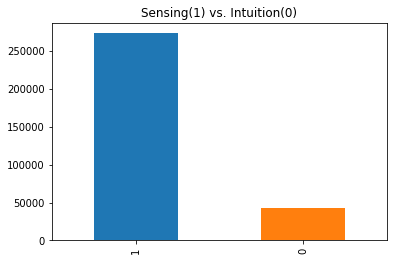

In [191]:
# S==1 and N ==0
all_mbti['S or N'].value_counts().plot(kind = 'bar')
plt.title("Sensing(1) vs. Intuition(0)", fontsize=12)
plt.show()

In [192]:
X_count.shape

(316548, 10)

In [193]:
X = X_count

In [194]:
yS = all_mbti['S or N']

In [195]:
vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(all_mbti['post'])

In [196]:
type(X)

scipy.sparse.csr.csr_matrix

In [197]:
X.shape

(316548, 152)

In [198]:
n = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:n].toarray(), yS[:n])

In [199]:
# if we assume that everyone is introverted would give us this accuracy
np.mean(y_train)

0.9141333333333334

In [200]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Naive Bayes', 'LDA', "QDA",
         "Decision Tree", "Random Forest",  "AdaBoost",
         "Neural Net"]

In [201]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...


C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...


C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
Fitting LDA model...
... predicting
... scoring
Fitting QDA model...


C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...


C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


... predicting
... scoring
Fitting Neural Net model...
... predicting
... scoring


C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [202]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,0.979200,0.977752,1.000000,0.988751,0.962225,4.952517
Nearest Neighbors,0.921067,0.925543,0.993582,0.958357,0.953020,0.115353
Decision Tree,0.915733,0.915598,1.000000,0.955940,0.960931,0.051589
AdaBoost,0.915467,0.915798,0.999417,0.955782,0.961363,0.794550
Logistic Regression,0.914133,0.914133,1.000000,0.955141,0.962225,0.023013
Linear SVM,0.914133,0.914133,1.000000,0.955141,0.962225,1.225953
Random Forest,0.914133,0.914133,1.000000,0.955141,0.962225,0.042601
Neural Net,0.914133,0.914133,1.000000,0.955141,0.962225,2.634311
LDA,0.913067,0.914263,0.998541,0.954545,0.961794,0.165190


In [203]:
confusion['Logistic Regression']

array([[   0,  322],
       [   0, 3428]], dtype=int64)

In [204]:
confusion['Linear SVM']

array([[   0,  322],
       [   0, 3428]], dtype=int64)

In [205]:
print(class_report['Nearest Neighbors'])

             precision    recall  f1-score   support

          0       0.69      0.15      0.24       322
          1       0.93      0.99      0.96      3428

avg / total       0.90      0.92      0.90      3750



## Cross validation on IE


In [206]:
from sklearn.model_selection import cross_val_score

In [207]:
model = models['Logistic Regression']
print(cross_val_score(model, X[:n].toarray(), yS[:n]))

[0.91661668 0.91481704 0.91656663]


In [208]:
model = models['Nearest Neighbors']
print(cross_val_score(model, X[:n].toarray(), yS[:n]))

[0.91061788 0.910018   0.91236495]


In [209]:
model = models['Linear SVM']
print(cross_val_score(model, X[:n].toarray(), yS[:n]))

[0.91721656 0.91721656 0.91776711]


---

In [210]:
cv = []
for name, model in models.items():
    print(name)
    scores = cross_val_score(model, X=X[:n].toarray(), y=y[:n], cv=10)
    print("Accuracy: {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))
    cv.append([name, scores.mean(), scores.std() ])

cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])
cv.set_index('Model', inplace=True)

Logistic Regression
Accuracy: 0.80 (+/- 0.01)
Nearest Neighbors
Accuracy: 0.72 (+/- 0.02)
Linear SVM
Accuracy: 0.80 (+/- 0.00)
RBF SVM
Accuracy: 0.80 (+/- 0.01)
Naive Bayes
Accuracy: 0.47 (+/- 0.05)
LDA
Accuracy: 0.79 (+/- 0.01)
QDA


C:\Users\Luckyboy\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.53 (+/- 0.08)
Decision Tree
Accuracy: 0.79 (+/- 0.00)
Random Forest
Accuracy: 0.80 (+/- 0.00)
AdaBoost
Accuracy: 0.79 (+/- 0.00)
Neural Net
Accuracy: 0.80 (+/- 0.00)



---

# Building models on [F or T]

In [73]:
#import and instantiate CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_count = vect.fit_transform(all_mbti['post'])

In [74]:
#Comapring the weights of each category
all_mbti['F or T'].value_counts()

1    171428
0    145120
Name: F or T, dtype: int64

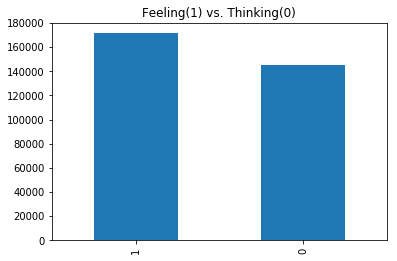

In [75]:
# F==1 and T ==0
all_mbti['F or T'].value_counts().plot(kind = 'bar')
plt.title("Feeling(1) vs. Thinking(0)", fontsize=12)
plt.show()

In [76]:
X_count.shape

(316548, 121556)

In [77]:
X = X_count

In [78]:
yF = all_mbti['F or T']

In [208]:
vect = CountVectorizer(lowercase=True, stop_words='english', max_features=10)
X = vect.fit_transform(all_mbti['post'])

In [215]:
X.shape

(316548, 10)

In [80]:
n = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:n].toarray(), yF[:n])

In [81]:
np.mean(y_train)

0.5890666666666666

In [82]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
Fitting LDA model...
... predicting
... scoring
Fitting QDA model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Neural Net model...
... predicting
... scoring


In [83]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,0.919200,0.886456,0.989588,0.935187,0.723293,3.517336
Nearest Neighbors,0.721867,0.759573,0.772295,0.765881,0.567018,0.031827
Neural Net,0.658667,0.651550,0.904029,0.757300,0.717453,1.075776
Decision Tree,0.606400,0.601048,0.986872,0.747087,0.735096,0.025754
Random Forest,0.591733,0.590642,1.000000,0.742646,0.733266,0.016225
Linear SVM,0.592800,0.591568,0.997284,0.742626,0.735234,3.041467
LDA,0.638133,0.642570,0.869172,0.738888,0.699301,0.060445
Logistic Regression,0.637333,0.641831,0.869624,0.738562,0.702953,0.011404
AdaBoost,0.624800,0.627221,0.894975,0.737549,0.717318,0.303854


In [125]:
confusion['Logistic Regression']

array([[1392,  560],
       [ 896,  902]], dtype=int64)

In [126]:
confusion['Linear SVM']

array([[1773,  179],
       [1399,  399]], dtype=int64)

In [127]:
print(class_report['Nearest Neighbors'])

             precision    recall  f1-score   support

          0       0.69      0.82      0.75      1952
          1       0.75      0.60      0.66      1798

avg / total       0.72      0.71      0.71      3750



## Cross validation on F or T

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
model = models['Logistic Regression']
print(cross_val_score(model, X[:n].toarray(), yF[:n]))

[ 0.58428314  0.59508098  0.6032413 ]


In [101]:
model = models['Nearest Neighbors']
print(cross_val_score(model, X[:n].toarray(), yF[:n]))

[ 0.53929214  0.50929814  0.51080432]


In [102]:
model = models['Linear SVM']
print(cross_val_score(model, X[:n].toarray(), yF[:n]))

[ 0.59208158  0.58728254  0.58823529]


---

In [103]:
cv = []
for name, model in models.items():
    print(name)
    scores = cross_val_score(model, X=X[:n].toarray(), y=y[:n], cv=10)
    print("Accuracy: {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))
    cv.append([name, scores.mean(), scores.std() ])

cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])
cv.set_index('Model', inplace=True)

Logistic Regression
Accuracy: 0.80 (+/- 0.01)
Nearest Neighbors
Accuracy: 0.72 (+/- 0.02)
Linear SVM
Accuracy: 0.80 (+/- 0.00)
RBF SVM
Accuracy: 0.80 (+/- 0.01)
Naive Bayes
Accuracy: 0.47 (+/- 0.05)
LDA
Accuracy: 0.79 (+/- 0.01)
QDA


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.53 (+/- 0.08)
Decision Tree
Accuracy: 0.79 (+/- 0.00)
Random Forest
Accuracy: 0.80 (+/- 0.00)
AdaBoost
Accuracy: 0.79 (+/- 0.00)
Neural Net
Accuracy: 0.80 (+/- 0.00)


---

---

In [112]:
df = pd.read_csv('test.csv')
df.head()

,type,posts
0,NaN,Musical Linguistic Logic & Naturalist (tied)|...
1,NaN,'You: hello :) Stranger: hii You: how are you ...
2,NaN,'What worked for me was knowing that limerence...
3,NaN,'Please forget about him. You should definitel...
4,NaN,"'Ooh, ENTJ Celestia is actually an interesting..."


In [113]:
## split the rows
all_df = []
for i, row in df.iterrows():
    for post in row['posts'].replace('|||', ' '):
        all_df.append([row['type'], post])
all_df = pd.DataFrame(all_df, columns=['type', 'post'])

## remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_df['post'] = all_df['post'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# make lower case
all_df['post'] = all_df['post'].str.lower()

import string
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
all_df['post'] = all_df['post'].apply(remove_punctuation_numbers)

MemoryError: 

In [102]:
all_df.head()

,type,post
0,NaN,musical linguistic logic naturalist tied
1,NaN,genuine question how do you guys feel about in...
2,NaN,i was in a killing game the type of weapon i w...
3,NaN,may have fcked up probably for the better d...
4,NaN,ssholes creatives nerds others who identify as...


In [103]:
# we will be using the standard CountVector to fit the model to see if we can indeed predict the
# introvert/extrovert status

vect = CountVectorizer(lowercase=True, stop_words='english', max_features=10)
X_count = vect.fit_transform(all_df['post'])

In [105]:
y_pred_test_IE = logreg.predict(X_count)
y_pred_test_NS = logreg.predict(X_count)
y_pred_test_TF = logreg.predict(X_count)
y_pred_test_JP = logreg.predict(X_count)

In [106]:
pred_i = y_pred_test_IE
pred_n = y_pred_test_NS
pred_t = y_pred_test_TF
pred_j = y_pred_test_TF

In [107]:
posts = all_df['post']

In [108]:
submit = pd.DataFrame(
{
    'I/E': pred_i,
    'N/S': pred_n,
    'T/F': pred_t,
    'J/P': pred_j,
    'posts': posts,
})
submit.to_csv('testing_submission.csv')

In [109]:
submit

,I/E,J/P,N/S,T/F,posts
0,1,1,1,1,musical linguistic logic naturalist tied
1,1,1,1,1,genuine question how do you guys feel about in...
2,1,1,1,1,i was in a killing game the type of weapon i w...
3,1,1,1,1,may have fcked up probably for the better d...
4,1,1,1,1,ssholes creatives nerds others who identify as...
5,1,1,1,1,okay yes i should have specified when i said t...
6,1,1,1,1,what i find misogynistic is how two people und...
7,1,1,1,1,stares at gif for like half an hour i like ...
8,1,1,1,1,uses the red pill to primarily sleep get with...
9,1,1,1,1,a sport i loved because of injury so i had mor...


## Building a model on [J or P]

In [85]:
#import and instantiate CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_count = vect.fit_transform(all_mbti['post'])

In [86]:
#Comapring the weights of each category
all_mbti['J or P'].value_counts()

0    191612
1    124936
Name: J or P, dtype: int64

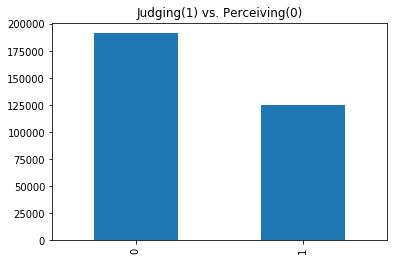

In [87]:
# S==1 and N ==0
all_mbti['J or P'].value_counts().plot(kind = 'bar')
plt.title("Judging(1) vs. Perceiving(0)", fontsize=12)
plt.show()

In [88]:
X = X_count

In [89]:
yJ = all_mbti['J or P']

In [109]:
vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(all_mbti['post'])

In [110]:
n = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:n].toarray(), yJ[:n])

In [111]:
# if we assume that everyone is introverted would give us this accuracy
np.mean(y_train)

0.47946666666666665

In [112]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
Fitting LDA model...
... predicting
... scoring
Fitting QDA model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Neural Net model...
... predicting
... scoring


In [113]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,0.911200,0.937836,0.872636,0.904062,0.243775,3.133102
QDA,0.686933,0.639535,0.795328,0.708974,0.597149,0.035052
Nearest Neighbors,0.711200,0.750877,0.595106,0.663978,0.450467,0.037232
Naive Bayes,0.589600,0.556773,0.706340,0.622702,0.600587,0.012055
Neural Net,0.645600,0.675131,0.502781,0.576347,0.485769,0.898178
LDA,0.614667,0.620314,0.506118,0.557427,0.508629,0.055357
Logistic Regression,0.611733,0.616963,0.501669,0.553374,0.506837,0.011109
AdaBoost,0.596000,0.625111,0.393215,0.482759,0.467139,0.281909
Linear SVM,0.579200,0.690311,0.221913,0.335859,0.289708,2.771624


## Cross validation on [J or P]

---

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_count = vect.fit_transform(all_mbti['post'])

In [115]:
model = models['Logistic Regression']
print(cross_val_score(model, X[:n].toarray(), yJ[:n]))

[ 0.54469106  0.52969406  0.53241297]


In [116]:
model = models['Nearest Neighbors']
print(cross_val_score(model, X[:n].toarray(), yJ[:n]))

[ 0.5434913   0.50569886  0.48559424]


In [117]:
model = models['Linear SVM']
print(cross_val_score(model, X[:n].toarray(), yJ[:n]))

[ 0.55728854  0.53029394  0.55762305]


___

In [118]:
cv = []
for name, model in models.items():
    print(name)
    scores = cross_val_score(model, X=X[:n].toarray(), y=y[:n], cv=10)
    print("Accuracy: {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))
    cv.append([name, scores.mean(), scores.std() ])

cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])
cv.set_index('Model', inplace=True)

Logistic Regression
Accuracy: 0.80 (+/- 0.01)
Nearest Neighbors
Accuracy: 0.72 (+/- 0.02)
Linear SVM
Accuracy: 0.80 (+/- 0.00)
RBF SVM
Accuracy: 0.80 (+/- 0.01)
Naive Bayes
Accuracy: 0.47 (+/- 0.05)
LDA
Accuracy: 0.79 (+/- 0.01)
QDA


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.53 (+/- 0.08)
Decision Tree
Accuracy: 0.79 (+/- 0.00)
Random Forest
Accuracy: 0.80 (+/- 0.00)
AdaBoost
Accuracy: 0.79 (+/- 0.00)
Neural Net
Accuracy: 0.80 (+/- 0.00)


In [84]:
from sklearn.svm import SVC

In [85]:
svm_m = SVC(kernel='linear', C=1)

In [86]:
model = svm_m.fit(X_train,y_train)

In [87]:
len(X_test)

1250

In [88]:
pred = model.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
print(confusion_matrix(y_test, pred))

[[   0  250]
 [   0 1000]]


In [91]:
pred_i = svm_m.predict(X_test)

In [92]:
pred_n = svm_m.predict(X_test)

In [93]:
pred_f = svm_m.predict(X_test)

In [94]:
pred_j = svm_m.predict(X_test)

In [95]:
results = [[pred_i,pred_n, pred_f, pred_j, all_df['post']]]

In [96]:
submit = pd.DataFrame(
{
    'IE': pred_i,
    'NS': pred_n,
    'TF': pred_f,
    'JP': pred_j,
    'posts': post,
})
submit.to_csv('new.csv')

In [98]:
neww['NS'].drop

1    1250
Name: NS, dtype: int64